In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython import display



**Loading the data**



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Copy the path of the file in the drive. You can also change the Directory.

In [4]:
df = pd.read_csv('/content/drive/MyDrive/datasets/credit_risk_dataset.csv')


In [5]:
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


**Size and information of the dataset**

In [6]:
df.shape

(32581, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


checking the null values in the dataset

In [8]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Filling null values with mode or median rather then deleting it due to more number of null values almost 10%.

In [9]:
print('person_emp_length mode {}'.format(df['person_emp_length'].mode()[0]))
print('person_emp_length median {}'.format(df['person_emp_length'].median()))
print('loan_int_rate mode {}'.format(df['loan_int_rate'].mode()[0]))
print('loan_int_rate median {}'.format(df['loan_int_rate'].median()))

person_emp_length mode 0.0
person_emp_length median 4.0
loan_int_rate mode 7.51
loan_int_rate median 10.99


In [10]:

df['person_emp_length'].fillna(df['person_emp_length'].mode()[0], inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)




After filling the null values

In [22]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [11]:
print('person_emp_length mode {}'.format(df['person_emp_length'].mode()[0]))
print('person_emp_length median {}'.format(df['person_emp_length'].median()))
print('loan_int_rate mode {}'.format(df['loan_int_rate'].mode()[0]))
print('loan_int_rate median {}'.format(df['loan_int_rate'].median()))

person_emp_length mode 0.0
person_emp_length median 4.0
loan_int_rate mode 10.99
loan_int_rate median 10.99


There is change in mode of Loan interest rate after filling null values with median

In [12]:
df.dtypes #checking the datatype of values in the column

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

Number of defaulter and non defaulter are to be checked to know the dataset

In [13]:
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

In [14]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [15]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [16]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.658114,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.159669,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


After observing the above values, there are some outlier which are impossible, i.e, MAX of persons age is 144 years, and MAX of person employment lenth is 123 years which cannot be possible.

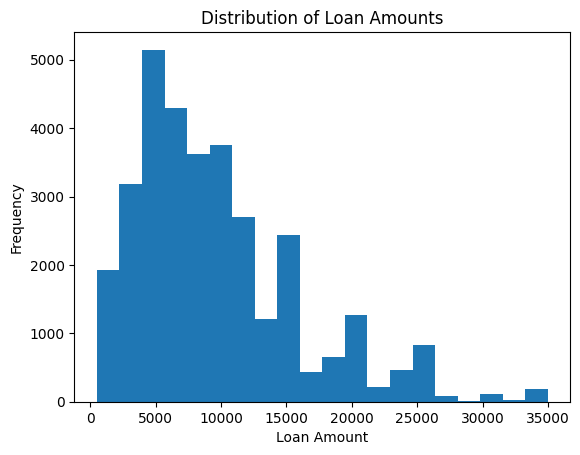

In [17]:
plt.hist(df['loan_amnt'], bins=20)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()

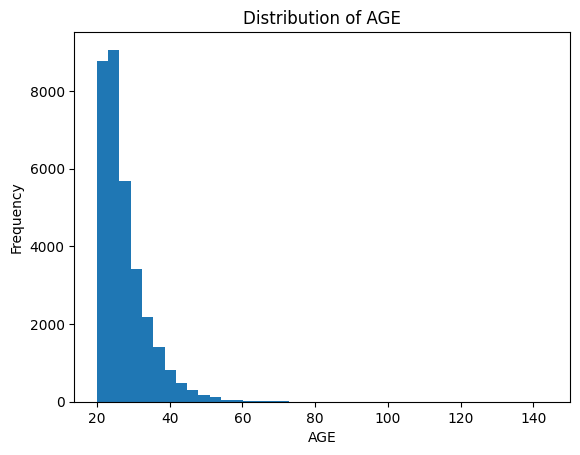

In [18]:
plt.hist(df['person_age'], bins=40)
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.title('Distribution of AGE')
plt.show()

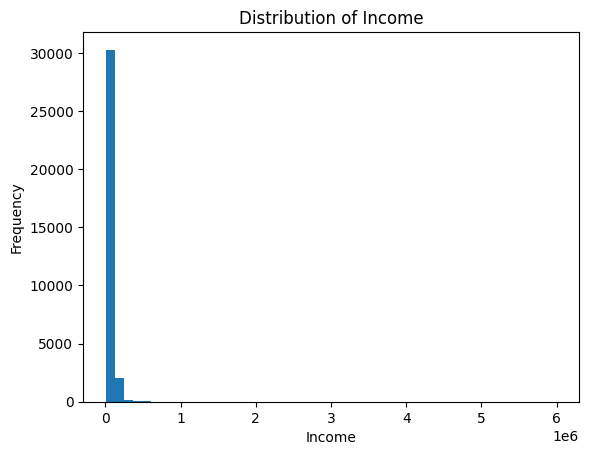

In [19]:
plt.hist(df['person_income'], bins=50)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

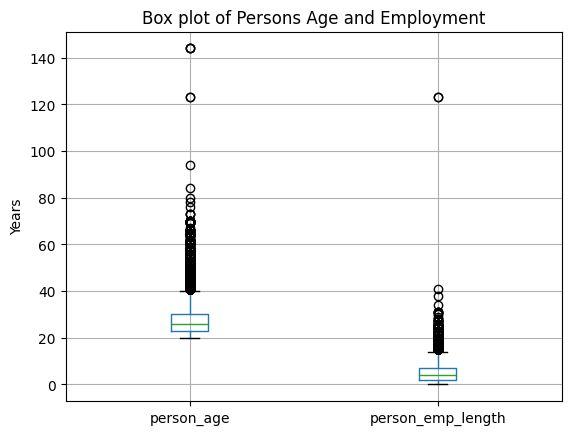

In [20]:

df.boxplot(['person_age','person_emp_length'])
plt.title('Box plot of Persons Age and Employment')
plt.ylabel('Years')
plt.show()


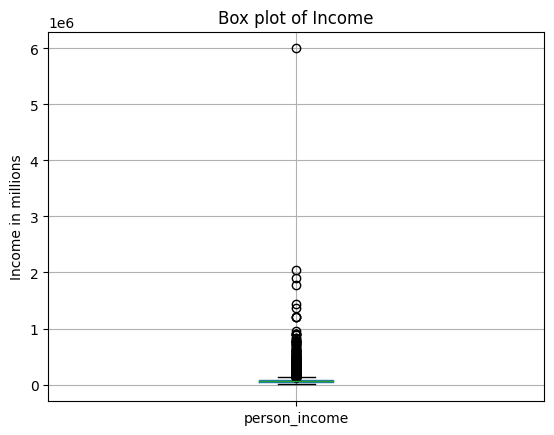

In [21]:
df.boxplot(['person_income'])
plt.title('Box plot of Income')
plt.ylabel('Income in millions')
plt.show()

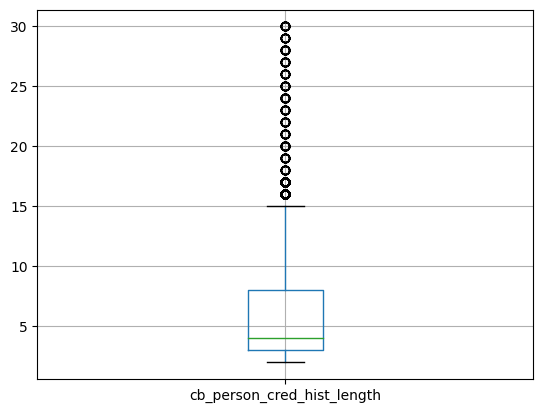

In [22]:
df.boxplot(['cb_person_cred_hist_length'])
plt.show()

From above box plot we can observe the outliers

In [23]:
df = df[df['person_age']<=100]
df = df[df['person_emp_length']<=60]
df = df[df['person_income']<=3.000000e+06]

Removing the outiers using above condition

In [24]:
df.shape

(32574, 12)

Checking the correlation chart using the Heatmap.

Figure(800x600)


<ipython-input-26-1110c77e98d2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=8,center =0,ax=ax,cmap="coolwarm")


<Axes: >

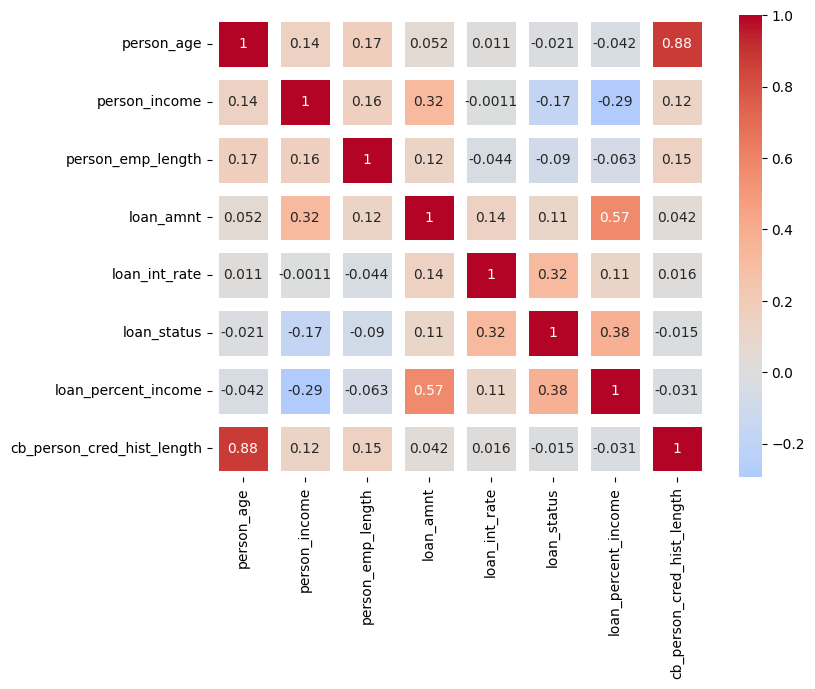

In [26]:
f , ax = plt.subplots(figsize=(8,6))
print(f)
sns.heatmap(df.corr(),annot=True,linewidths=8,center =0,ax=ax,cmap="coolwarm")


**One hot encoding** of categorical columns.

In [27]:
dfohc= pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], drop_first=True)
dfohc.head(30)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,1,...,0,0,1,0,0,0,0,0,0,0
6,26,77100,8.0,35000,12.42,1,0.45,3,0,0,...,0,0,0,1,0,0,0,0,0,0
7,24,78956,5.0,35000,11.11,1,0.44,4,0,0,...,1,0,0,1,0,0,0,0,0,0
8,24,83000,8.0,35000,8.90,1,0.42,2,0,0,...,0,1,0,0,0,0,0,0,0,0
9,21,10000,6.0,1600,14.74,1,0.16,3,0,1,...,0,0,1,0,0,1,0,0,0,0
10,22,85000,6.0,35000,10.37,1,0.41,4,0,0,...,0,0,1,1,0,0,0,0,0,0


Figure(3000x1600)


<Axes: >

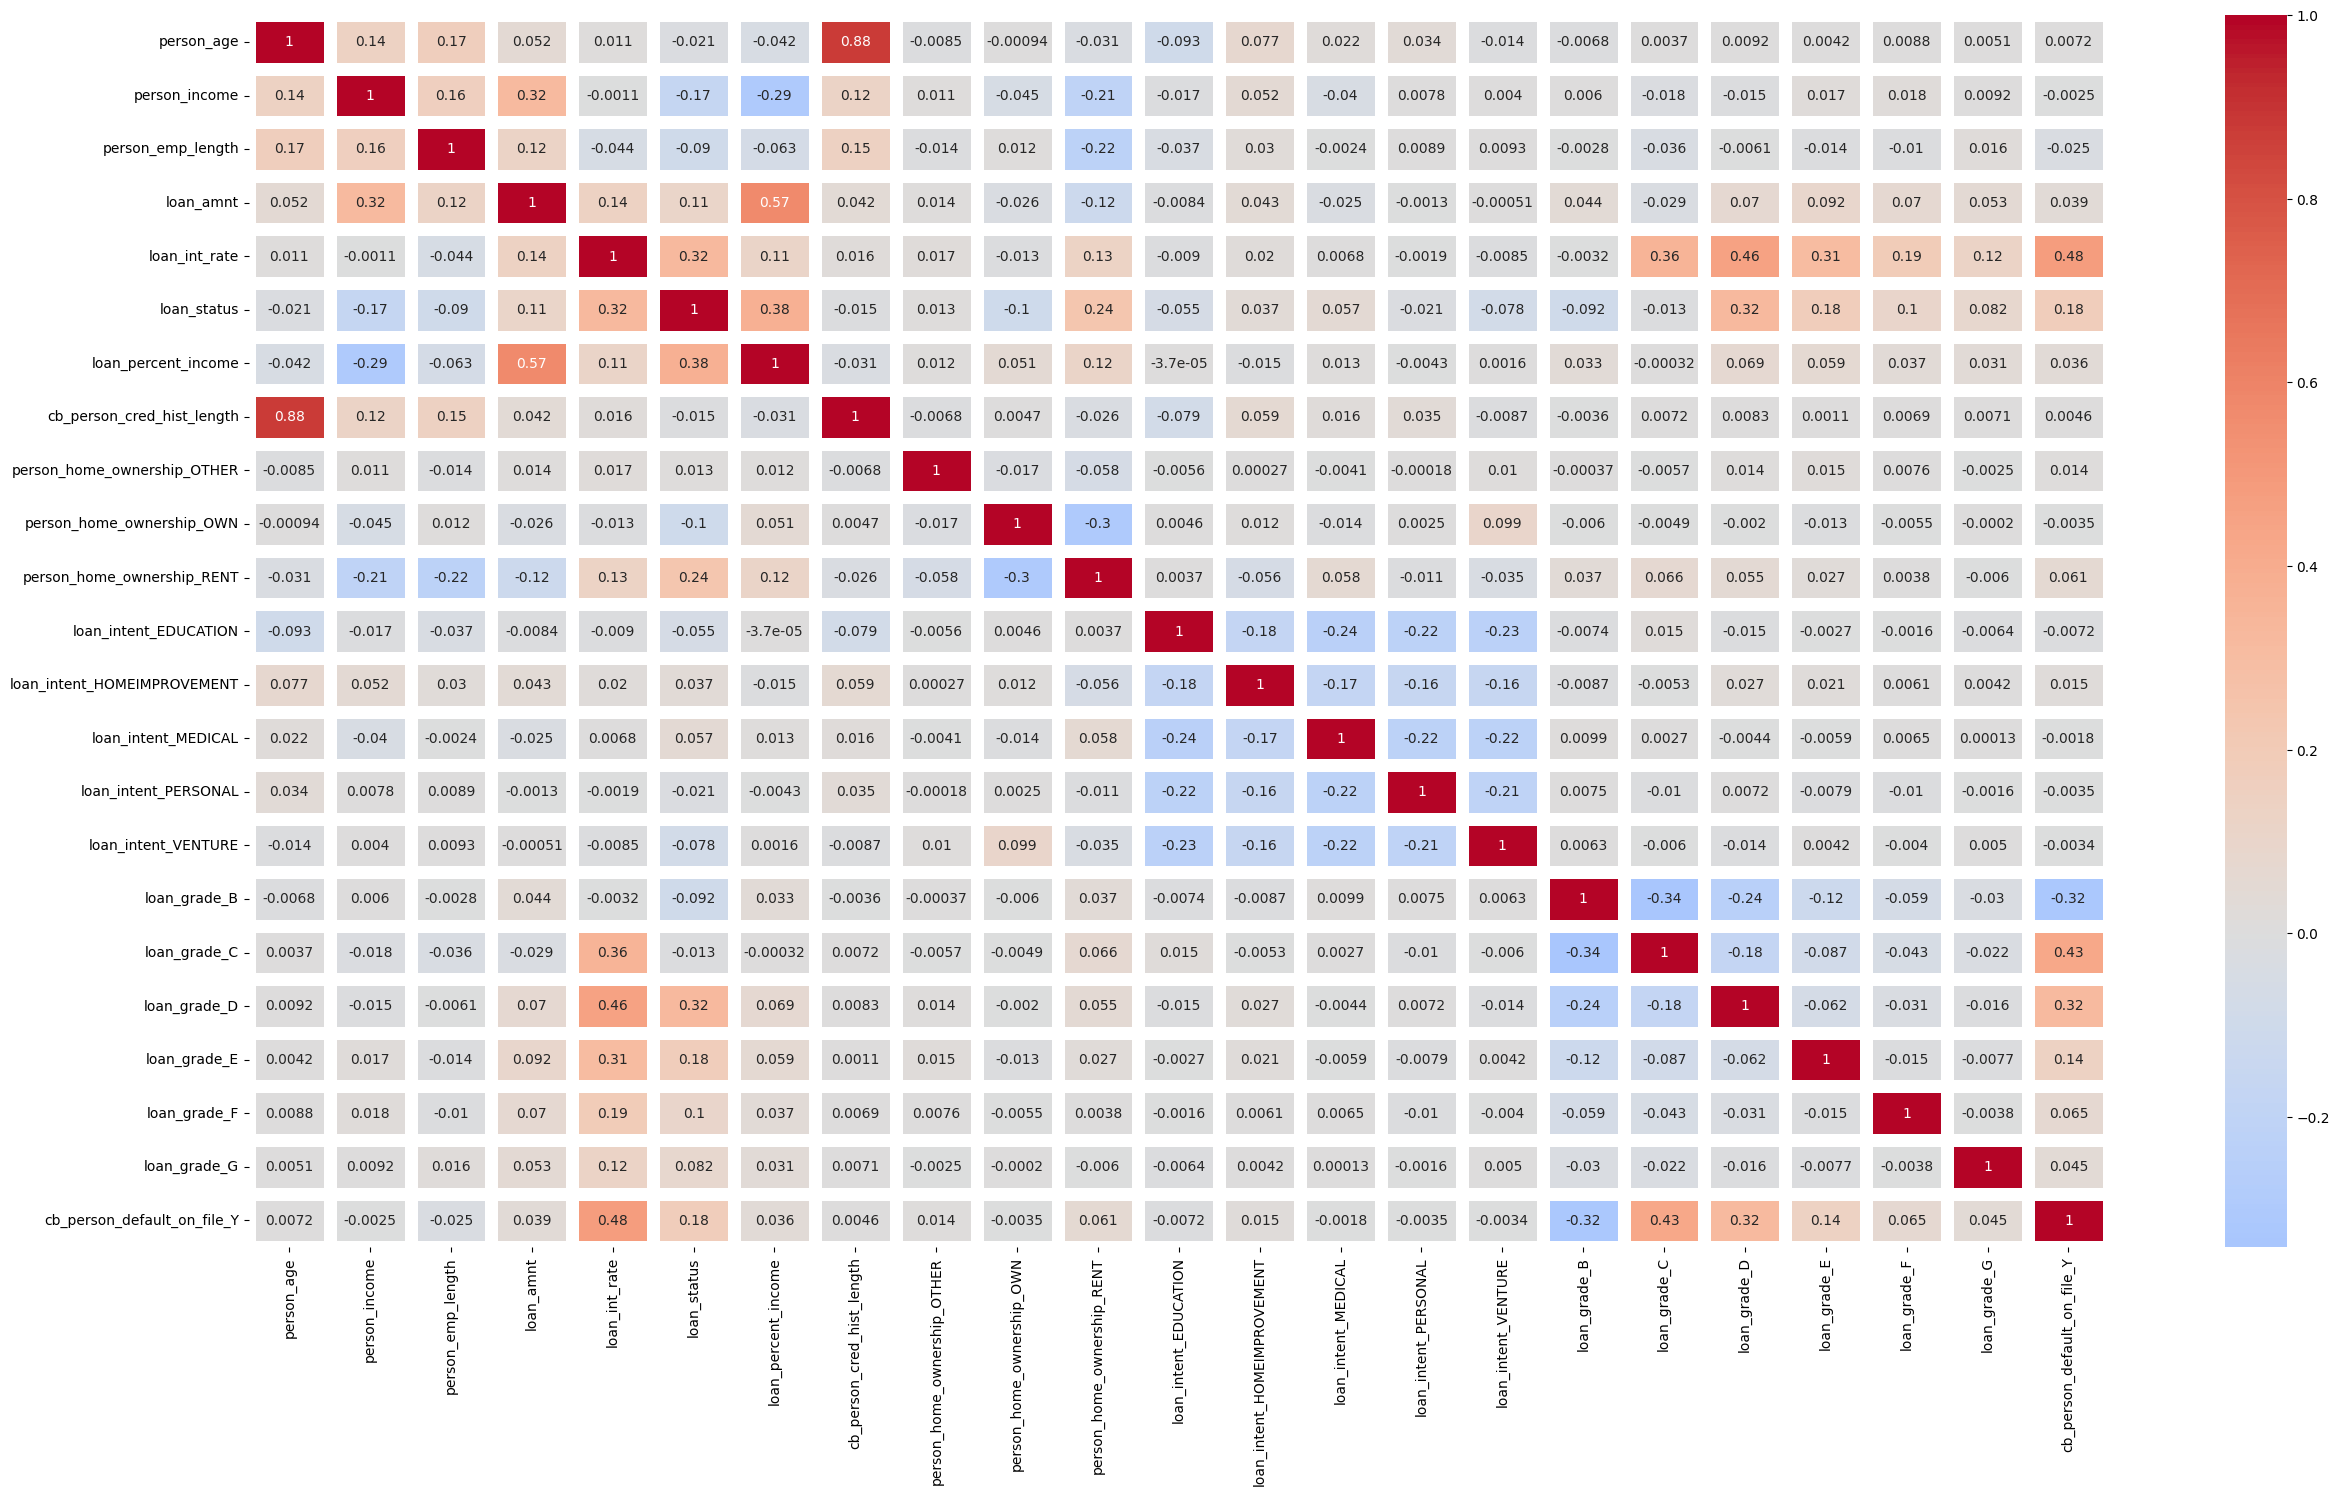

In [28]:
f , ax = plt.subplots(figsize=(30,16))
print(f)
sns.heatmap(dfohc.corr(), annot=True,linewidths=8,center =0,ax=ax,cmap="coolwarm")

Separating the input and out (X & Y).

In [29]:
Y=dfohc['loan_status']
X= dfohc.drop('loan_status',axis=1)

In [52]:
X

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0.10,2,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,0.57,3,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,0.53,2,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,0.55,4,0,0,1,...,1,0,0,0,1,0,0,0,0,1
5,21,9900,2.0,2500,7.14,0.25,2,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,30,0,0,0,...,0,1,0,0,1,0,0,0,0,0
32577,54,120000,4.0,17625,7.49,0.15,19,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32578,65,76000,3.0,35000,10.99,0.46,28,0,0,1,...,0,0,0,1,0,0,0,0,0,0
32579,56,150000,5.0,15000,11.48,0.10,26,0,0,0,...,0,1,0,1,0,0,0,0,0,0


Performing the Train test split of (0.75:0.25)

In [30]:
from sklearn.model_selection import train_test_split

X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=10)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(24430, 22) (24430,)
(8144, 22) (8144,)


**Data Transformation**

In [33]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_train_trans = scale.fit_transform(X_train)
print(X_train_trans.shape)
X_test_trans = scale.transform(X_test)
print(X_test_trans.shape)


(24430, 22)
(8144, 22)


In [34]:
X_train_trans

array([[-0.76047974, -0.26579741,  0.57866681, ..., -0.08542872,
        -0.04390413, -0.46178989],
       [-0.76047974,  0.99037087,  0.57866681, ..., -0.08542872,
        -0.04390413, -0.46178989],
       [ 0.37467066,  0.01442474,  0.08617155, ..., -0.08542872,
        -0.04390413, -0.46178989],
       ...,
       [ 2.4828071 ,  2.20788783,  0.08617155, ..., -0.08542872,
        -0.04390413, -0.46178989],
       [-0.92264408, -0.69096206, -0.16007608, ..., -0.08542872,
        -0.04390413,  2.165487  ],
       [-0.76047974, -0.30444874,  0.08617155, ..., -0.08542872,
        -0.04390413, -0.46178989]])

The above code is creating array as output, To create dataframe below code is written

In [35]:
cols=['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','person_home_ownership_OTHER','person_home_ownership_OWN','person_home_ownership_RENT','loan_intent_EDUCATION','loan_intent_HOMEIMPROVEMENT','loan_intent_MEDICAL','loan_intent_PERSONAL','loan_intent_VENTURE','loan_grade_B','loan_grade_C','loan_grade_D','loan_grade_E','loan_grade_F','loan_grade_G','cb_person_default_on_file_Y']

In [36]:


scale = StandardScaler()

X_train_transformed = pd.DataFrame(scale.fit_transform(X_train),columns=cols,index = X_train.index)
X_test_transformed = pd.DataFrame(scale.transform(X_test),columns=cols,index = X_test.index)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
15001,-0.760480,-0.265797,0.578667,0.857754,1.055419,1.119782,-0.692179,-0.056595,-0.294195,0.991522,...,-0.477632,-0.452432,2.183088,-0.691511,2.031759,-0.356226,-0.173386,-0.085429,-0.043904,-0.46179
14857,-0.760480,0.990371,0.578667,-0.931503,-0.087376,-1.313617,-0.692179,-0.056595,-0.294195,-1.008551,...,2.093664,-0.452432,-0.458067,1.446109,-0.492184,-0.356226,-0.173386,-0.085429,-0.043904,-0.46179
23863,0.374671,0.014425,0.086172,-0.250636,-1.015897,-0.471287,0.794343,-0.056595,-0.294195,-1.008551,...,-0.477632,-0.452432,-0.458067,-0.691511,-0.492184,-0.356226,-0.173386,-0.085429,-0.043904,-0.46179
30338,1.509821,-0.265797,-0.898819,0.857754,-0.006212,1.119782,2.033111,-0.056595,-0.294195,-1.008551,...,-0.477632,-0.452432,2.183088,-0.691511,-0.492184,-0.356226,-0.173386,-0.085429,-0.043904,-0.46179
1884,-0.598315,-0.207820,-0.160076,0.841920,0.266501,0.932597,-0.692179,-0.056595,-0.294195,0.991522,...,-0.477632,2.210278,-0.458067,1.446109,-0.492184,-0.356226,-0.173386,-0.085429,-0.043904,-0.46179


In [37]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24430 entries, 15001 to 17679
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   24430 non-null  float64
 1   person_income                24430 non-null  float64
 2   person_emp_length            24430 non-null  float64
 3   loan_amnt                    24430 non-null  float64
 4   loan_int_rate                24430 non-null  float64
 5   loan_percent_income          24430 non-null  float64
 6   cb_person_cred_hist_length   24430 non-null  float64
 7   person_home_ownership_OTHER  24430 non-null  float64
 8   person_home_ownership_OWN    24430 non-null  float64
 9   person_home_ownership_RENT   24430 non-null  float64
 10  loan_intent_EDUCATION        24430 non-null  float64
 11  loan_intent_HOMEIMPROVEMENT  24430 non-null  float64
 12  loan_intent_MEDICAL          24430 non-null  float64
 13  loan_intent_

**Modeling**

Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression


LR_model = LogisticRegression()

LR_model.fit(X_train_transformed,Y_train)

y_pred_LR = LR_model.predict(X_test_transformed)

In [41]:
from sklearn import  metrics

from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_auc_score, classification_report

print(classification_report(Y_test, LR_model.predict(X_test_transformed)))
LR_AUC=metrics.accuracy_score(Y_test,y_pred_LR)
print(LR_AUC)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6423
           1       0.76      0.56      0.64      1721

    accuracy                           0.87      8144
   macro avg       0.83      0.76      0.78      8144
weighted avg       0.86      0.87      0.86      8144

0.8699656188605108


KNN

In [42]:
from sklearn.neighbors import  KNeighborsClassifier

KNNcls =  KNeighborsClassifier()
KNNcls.fit(X_train_transformed,Y_train)
y_pred_KNN = KNNcls.predict(X_test_transformed)

print(classification_report(Y_test, KNNcls.predict(X_test_transformed)))
KNN_AUC=metrics.accuracy_score(Y_test,y_pred_KNN)
print(KNN_AUC)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6423
           1       0.85      0.64      0.73      1721

    accuracy                           0.90      8144
   macro avg       0.88      0.80      0.83      8144
weighted avg       0.90      0.90      0.89      8144

0.900171905697446


Support vetcor machines (SVM)

In [43]:
from sklearn.svm import SVC

SVMa = SVC()
SVMa.fit(X_train_transformed,Y_train)
y_pred_SVC = SVMa.predict(X_test_transformed)

print(classification_report(Y_test, SVMa.predict(X_test_transformed)))
SVM_AUC=metrics.accuracy_score(Y_test,y_pred_SVC)
print(SVM_AUC)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6423
           1       0.93      0.66      0.77      1721

    accuracy                           0.92      8144
   macro avg       0.92      0.82      0.86      8144
weighted avg       0.92      0.92      0.91      8144

0.9161345776031434


Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

DTc = DecisionTreeClassifier()
DTc.fit(X_train_transformed,Y_train)
y_pred_DT = DTc.predict(X_test_transformed)

print(classification_report(Y_test, DTc.predict(X_test_transformed)))
DT_AUC=metrics.accuracy_score(Y_test,y_pred_DT)
print(DT_AUC)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6423
           1       0.73      0.78      0.75      1721

    accuracy                           0.89      8144
   macro avg       0.84      0.85      0.84      8144
weighted avg       0.90      0.89      0.89      8144

0.893172888015717


Random Forest

In [45]:

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train_transformed,Y_train)
y_pred_RF = RFC.predict(X_test_transformed)

print(classification_report(Y_test, RFC.predict(X_test_transformed)))
RFC_AUC=metrics.accuracy_score(Y_test,y_pred_RF)
print(RFC_AUC)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6423
           1       0.95      0.73      0.82      1721

    accuracy                           0.93      8144
   macro avg       0.94      0.86      0.89      8144
weighted avg       0.93      0.93      0.93      8144

0.9336935166994106


Plot of Accuracy of models

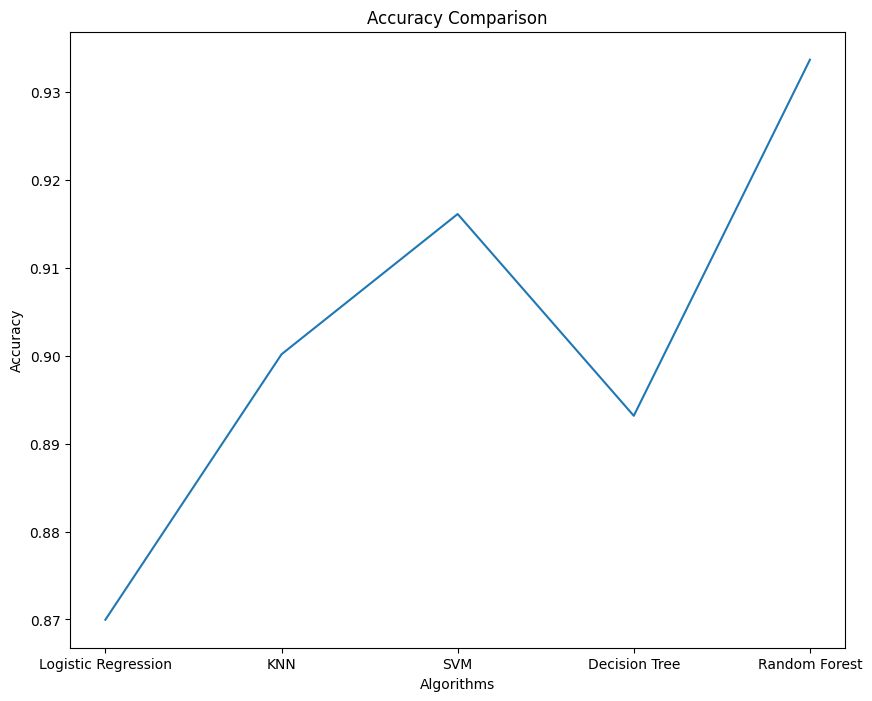

In [46]:
plt.figure(figsize=(10,8))
plt.plot(['Logistic Regression','KNN','SVM','Decision Tree','Random Forest'],[LR_AUC,KNN_AUC,SVM_AUC,DT_AUC,RFC_AUC])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()


Bar plot of Accuracy

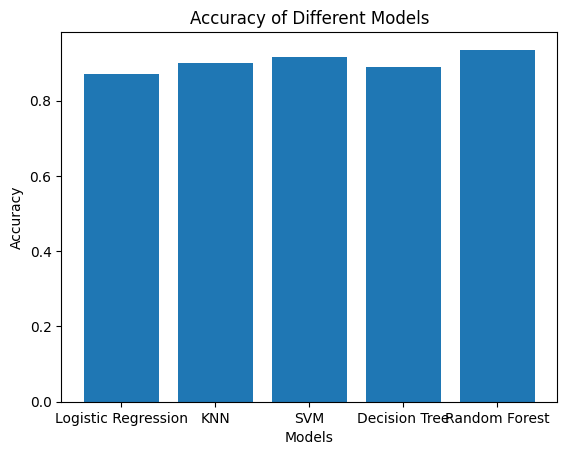

In [99]:
models = [LR_model, KNNcls, SVMa, DTc, RFC]
models_names = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest']
accuracies = [LR_AUC, KNN_AUC, SVM_AUC, DT_AUC, RFC_AUC]
plt.bar(models_names, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()

**Conclusion**:
After evaluating the given models the accuracy of Random Forest Classifier gives an accuracy of 0.935, compared to other models and Support vector machines with 0.916 accuracy.